### This is a notebook which keeps all the basic requirement for learning image processing and can be a useful notebook for others to refer whenever they need a refresher in computer vision concept. Check out the documentation to learn more about few of the functions.

##### Enjoy!

# Blending images of the same size

In [1]:
import cv2
import matplotlib.pyplot as plt

img1=cv2.imread('paris1.jpg')
img2=cv2.imread('gorilla.jpg')

In [2]:
img1=cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img2=cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)

In [3]:
img1=cv2.resize(img1,(600,600))
img2=cv2.resize(img2,(600,600))

In [4]:
img1.shape

(600, 600, 3)

** Blended formula
** 
###### Formula: new_pixel = alpha*pixel + beta*pixel + gamma

In [5]:
blended=cv2.addWeighted(src1=img1,alpha=0.8,src2=img2,beta=0.2,gamma=0)

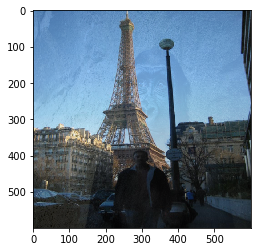

In [6]:
plt.imshow(blended)

# Overlay Small image on top of large images

In [7]:
img1=cv2.imread('giraffes.jpg')
img2=cv2.imread('watermark_no_copy.png')

img1=cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)


In [8]:
img1.shape,img2.shape

((1405, 933, 3), (1280, 1277, 3))

In [9]:
img2=cv2.resize(img2,(600,600))

In [10]:
y_offset=1405-600
x_offset=933-600
rows,cols,channels=img2.shape

In [11]:
roi=img1[y_offset:1401,x_offset:934]

roi=cv2.resize(roi,(600,600))
#This is the region of interest where we want to overlay the image

In [12]:
img2gray=cv2.cvtColor(img2,cv2.COLOR_RGB2GRAY)

In [13]:
mask_inv=cv2.bitwise_not(img2gray)

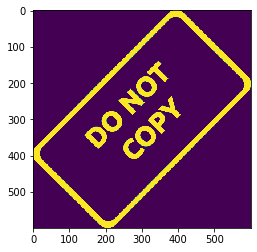

In [14]:
plt.imshow(mask_inv)

In [15]:
mask_inv.shape

(600, 600)

In [16]:
import numpy as np

In [17]:
white_background=np.full(img2gray.shape,255,dtype=np.uint8)

In [18]:
bk=cv2.bitwise_or(src1=white_background,src2=white_background,mask=mask_inv)

In [19]:
fg=cv2.bitwise_or(src1=img2,src2=img2,mask=mask_inv)

In [20]:
fg.shape

(600, 600, 3)

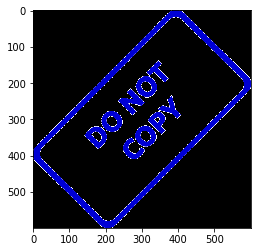

In [21]:
plt.imshow(fg)

In [22]:
final_roi=cv2.bitwise_or(roi,fg)

In [23]:
roi=cv2.resize(roi,(600,600))

In [24]:
 img1[y_offset:1405,x_offset:934]=final_roi

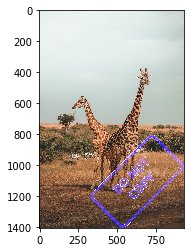

In [25]:
plt.imshow(img1)

# --------------------------------------------------------------------------------------------------------------




## Thresholding

##### Used for extracting a particular portion or object in the image

In [47]:
pic=cv2.imread('rainbow.jpg')

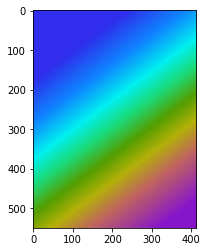

In [48]:
plt.imshow(pic)

In [49]:
pic=cv2.cvtColor(pic,cv2.COLOR_BGR2GRAY)

In [50]:
ret,thresh=cv2.threshold(pic,127,255,cv2.THRESH_BINARY)

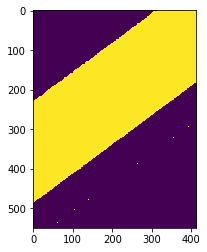

In [51]:
plt.imshow(thresh)

## We see that the brighter colours are in the middle region and are represented by the yellow strations
# -------------------------------------------------------------------------------------------------------------

## Blurring images

###### This is used to remove noise from the images

###### There are various blurring techniques, 
* 2D Convolution (image Filtering)
* blur function
* medianblur function
* bilateral function
* gaussian function

In [69]:
def display_img(img):
    fig=plt.figure(figsize=(6,6))
    ax=fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [70]:
img_org=cv2.imread('sammy.jpg')
img_org=cv2.cvtColor(img_org,cv2.COLOR_BGR2RGB)

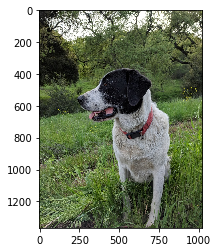

In [71]:
plt.imshow(img_org)

In [72]:
img_noise=cv2.imread('sammy_noise.jpg')
img_noise=cv2.cvtColor(img_noise,cv2.COLOR_BGR2RGB)

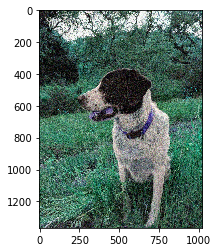

In [73]:
plt.imshow(img_noise)

## We will try to reduce the noise now

In [85]:
kernel=np.ones(shape=(5,5),dtype=np.float32)/25

In [86]:
dst=cv2.filter2D(img_noise,-1,kernel)

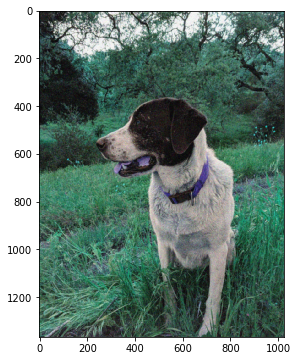

In [87]:
display_img(dst)

#### Now applying normal blur

In [77]:
dst1=cv2.blur(img_noise,ksize=(5,5))

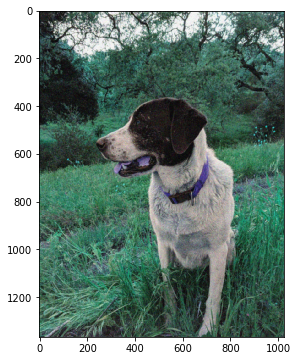

In [78]:
display_img(dst1)

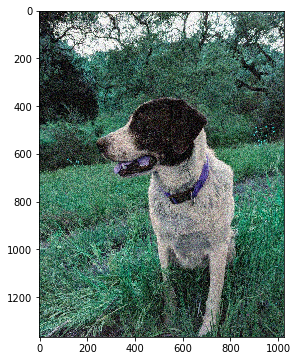

In [80]:
display_img(img_noise)

#### So far we have seen a lot of noise being cleared by both function. The blur function has reduced a lot of the noise from the background

#### Let's try using other blurs

In [83]:
dst2=cv2.GaussianBlur(img_noise,(5,5),10)

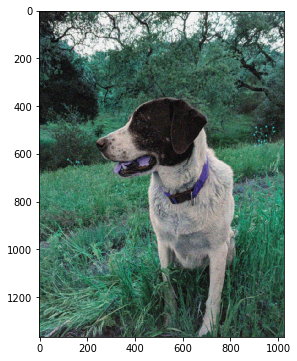

In [84]:
display_img(dst2)

In [90]:
dst3=cv2.medianBlur(img_noise,7)

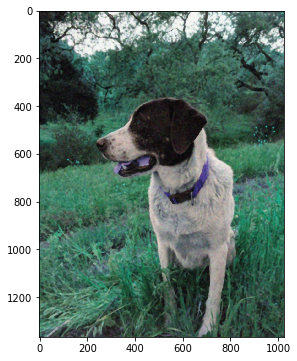

In [91]:
display_img(dst3)

In [92]:
dst4=cv2.bilateralFilter(img_noise,9,75,75)

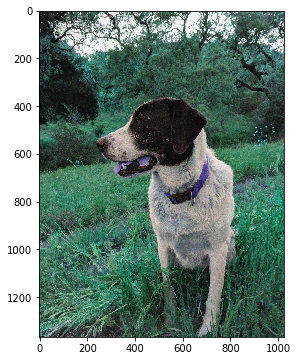

In [93]:
display_img(dst4)

# --------------------------------------------------------------------------------------------------------------

## Morphological Operators
* erode- reduce the image
* dilation- expand the image
* opening- erosion followig dilation
* closing- dilation followed by erosion
* gradient- To get only the edges

In [108]:
img=cv2.imread('morphological operator1.png')

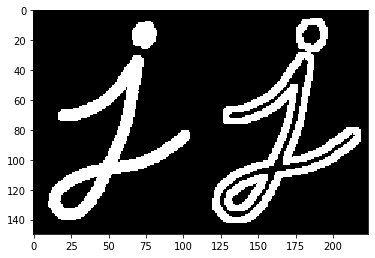

In [109]:
display_img(img)

##### Let's dilate it

In [110]:
kernel=np.ones(shape=(3,3),dtype=np.uint8)
img1=cv2.dilate(img,kernel,iterations=1)

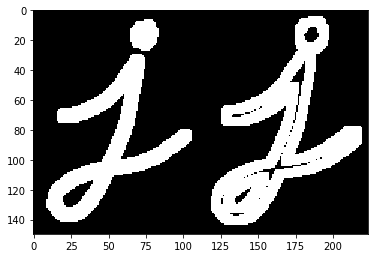

In [111]:
display_img(img1)

#### You can see the expansion of the edges

In [112]:
img2=cv2.erode(img,kernel,iterations=1)

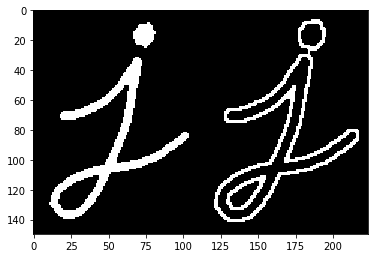

In [113]:
display_img(img2)

#### We can see the difference

In [120]:
def load_img():
    blank_img =np.zeros((600,600))
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(blank_img,text='ABCDE',org=(50,300), fontFace=font,fontScale= 5,color=(255,255,255),thickness=25,lineType=cv2.LINE_AA)
    return blank_img

In [121]:
img = load_img()

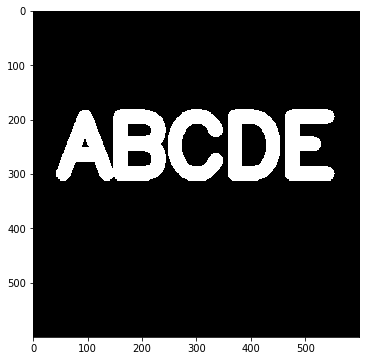

In [122]:
display_img(img)

In [124]:
# Creating noise
white_noise=np.random.randint(low=0,high=2,size=(600,600))
white_noise=white_noise*255
noise_img=white_noise+img

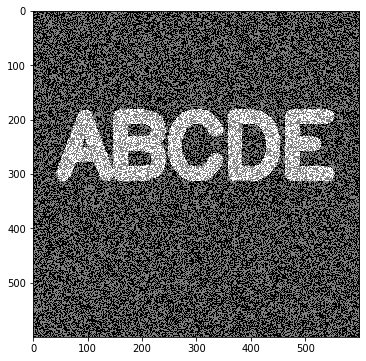

In [126]:
display_img(noise_img)

### Let's remove this

In [129]:
kernel=np.ones(shape=(5,5),dtype=np.uint8)
opening=cv2.morphologyEx(noise_img,cv2.MORPH_OPEN,kernel)

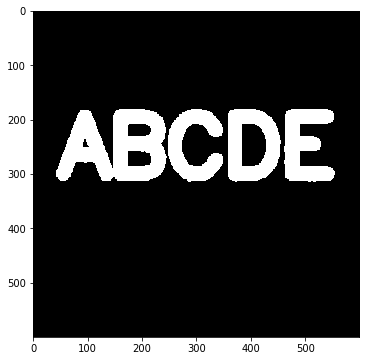

In [130]:
display_img(opening)

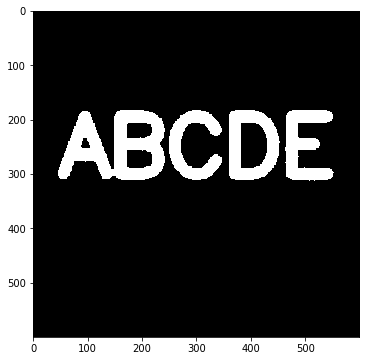

In [131]:
# So it first eroded and then dilated
eroded=cv2.erode(noise_img,kernel,iterations=1)
display_img(eroded)

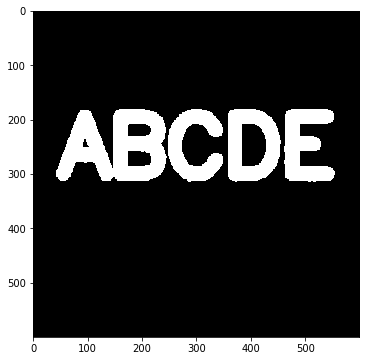

In [132]:
dilated=cv2.dilate(eroded,kernel,iterations=1)
display_img(dilated)

#### Just to clarify that the results look fairly similar 

In [141]:
black_noise=np.random.randint(low=0,high=2,size=(600,600))
black_noise=black_noise*-255

noise_img=black_noise+img
noise_img[noise_img==-255] = 0

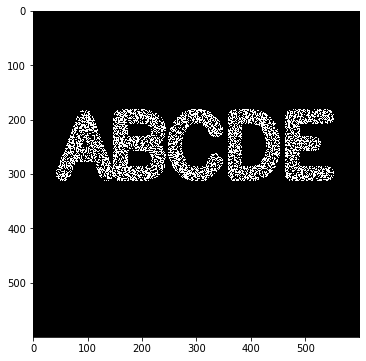

In [142]:
display_img(noise_img)

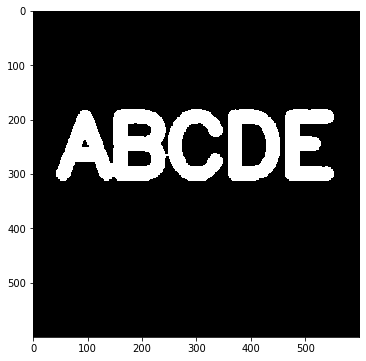

In [143]:
closing=cv2.morphologyEx(noise_img,cv2.MORPH_CLOSE,kernel)
display_img(closing)

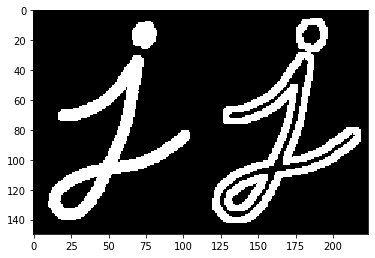

In [144]:
img=cv2.imread('morphological operator1.png')
display_img(img)

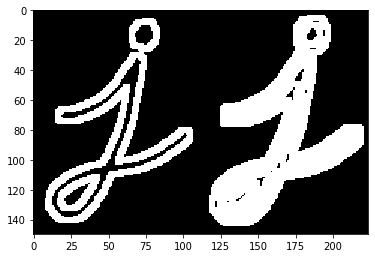

In [145]:
gradient=cv2.morphologyEx(img,cv2.MORPH_GRADIENT,kernel)
display_img(gradient)

# -------------------------------------------------------------------------------------------------------------


## Sobel Operators

#### Important for edge detection!

In [151]:
img=cv2.imread('sudoku.jpg',0)

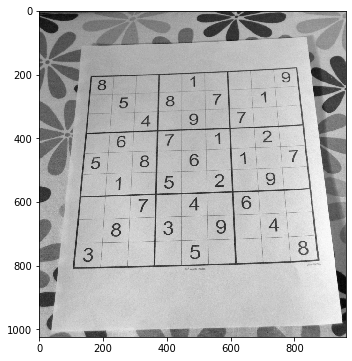

In [152]:
display_img(img)

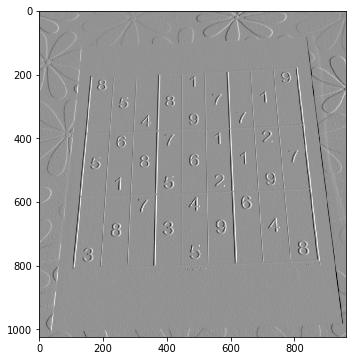

In [153]:
sobelx=cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
display_img(sobelx)

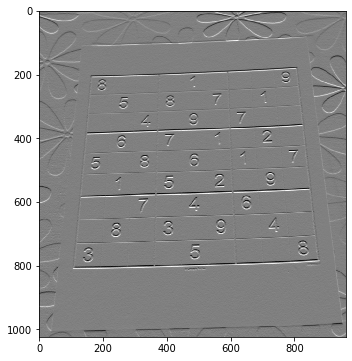

In [154]:
sobely=cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)
display_img(sobely)

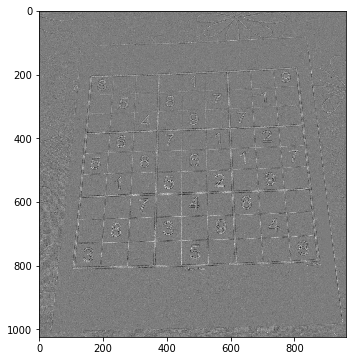

In [157]:
laplacian = cv2.Laplacian(img,cv2.CV_64F)
display_img(laplacian)

# --------------------------------------------------------------------------------------------------------------

# Histograms
### To check distribution of data

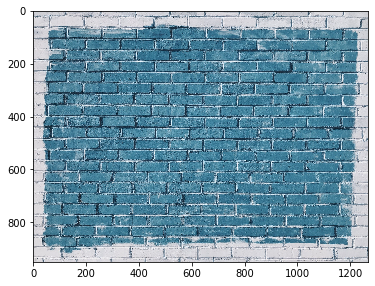

In [174]:
img=cv2.imread('bricks.jpg')
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
display_img(img)

Text(0.5, 1.0, 'The Range of values B,G,R levels in the image')

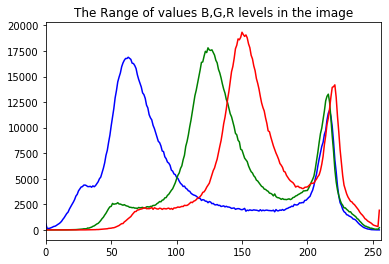

In [175]:
color=('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.title('The Range of values B,G,R levels in the image')